<a href="https://colab.research.google.com/github/EnneRebeca/An-lises-com-Python/blob/main/Atividade_2_Enne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A) Busque um dataset e fa√ßa histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Fa√ßa dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classifica√ß√£o usando aprendizado de m√°quina e tamb√©m discuta os tamanhos dos bins usados**

**Dataset: An√°lise de sentimentos em Rede Social**
 https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
---

**Contexto**: O dataset foi extraido do Kaggle afim de auxiliar na execu√ß√£o do trabalho. O documento fornece como feactures Likes, retweets, platform (instagram, facebook etc) dentre outros. Nesse contexto, foi utilizado os "likes" e "Retweets" e as classes podem ser representados pelos sentimentos (positivos, negativos ou neutros) ou pelas hashtags analisadas, como #fitness e #food.

Bibliotecas utilizadas

In [65]:
#Bibliotecas utilizadas na atividade

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom

Carregando dataset

In [3]:
# Caminho do arquivo CSV
file_path = "sentimentdataset.csv"

# Leitura do arquivo
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! üí™          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes  

## Cria√ß√£o do Histograma

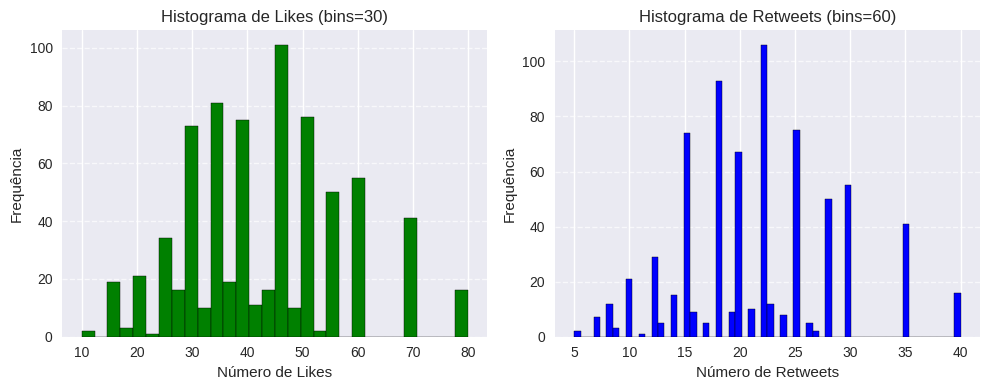

In [ ]:
# Limpeza de dados
df_clean = df.dropna(subset=['Likes','Retweets'])

# N√∫mero de Bins
bins_30 = 30
bins_60 = 60

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma: 30 bins
axes[0].hist(df_clean['Likes'], bins=bins_30, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes (bins={bins_30})')
axes[0].set_xlabel('N√∫mero de Likes')
axes[0].set_ylabel('Frequ√™ncia')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma: 60 bins
axes[1].hist(df_clean['Retweets'], bins=bins_60, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets (bins={bins_60})')
axes[1].set_xlabel('N√∫mero de Retweets')
axes[1].set_ylabel('Frequ√™ncia')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

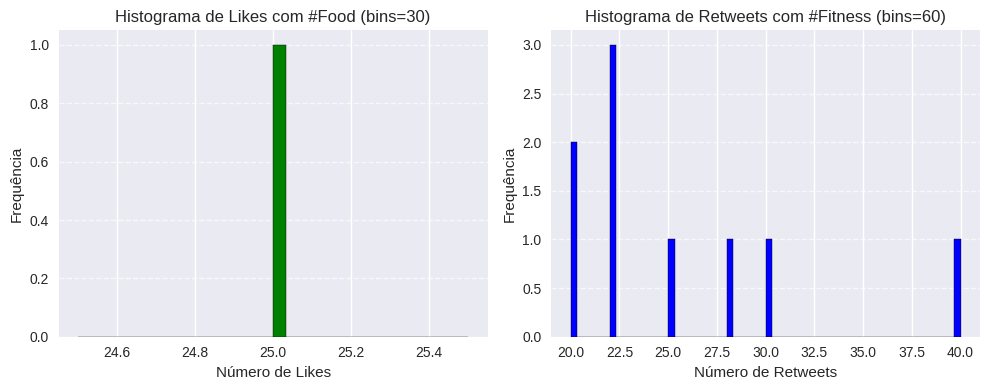

In [21]:
# Limpeza dos dados: removendo os valores nulls 'Likes' e 'Retweets'
df_clean = df.dropna(subset=['Likes', 'Retweets'])

# Filtro com a hashtag #Food
df_food = df_clean[df_clean['Hashtags'].str.contains('#Food', case=False, na=False)]

# Filtro com a hashtag #Fitness
df_fitness = df_clean[df_clean['Hashtags'].str.contains('#Fitness', case=False, na=False)]

# N√∫mero de Bins
bins_likes = 30  # Menos bins + intervalo por bin
bins_retweets = 60  # Mais bins - intervalo por bin

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma
axes[0].hist(df_food['Likes'], bins=bins_likes, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes com #Food (bins={bins_likes})')
axes[0].set_xlabel('N√∫mero de Likes')
axes[0].set_ylabel('Frequ√™ncia')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma
axes[1].hist(df_fitness['Retweets'], bins=bins_retweets, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets com #Fitness (bins={bins_retweets})')
axes[1].set_xlabel('N√∫mero de Retweets')
axes[1].set_ylabel('Frequ√™ncia')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

**Discuss√£o**:
1.   Histograma de Likes com a hashtag #Food: (bins=30) simplifica a apresenta√ß√£o do histograma, contudo os dados ficam concentrados.
O histograma indica que a hashtag #Food recebeu aproximadamente 25 likes, n√∫mero de curtidas, sugerindo que essa concentra√ß√£o tendem a ter uma frequ√™ncia de curtidas consistente.
2.  Histograma de Retweets com a  hashtag #Fitness: (bins=60) esse n√∫mero de bins, mostra um menor intervalo por bin, ajuda na melhor visualiza√ß√£o dos detalhes dos dados, assim como, ajuda a distinguir padr√µes de engajamento. Esse histograma possui uma distribui√ß√£o mais dispersa, de 20 a 40 retweets, ou seja, tem maior variabilidade.

**B)** **Considerando o primeiro trabalho, defina um experimento em que dados s√£o coletados de uma vari√°vel de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribui√ß√£o que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da vers√£o n√£o padronizada e depois os c√°lculos na vers√£o padronizada.  Sempre considerando o contexto do seu primeiro trabalho.**

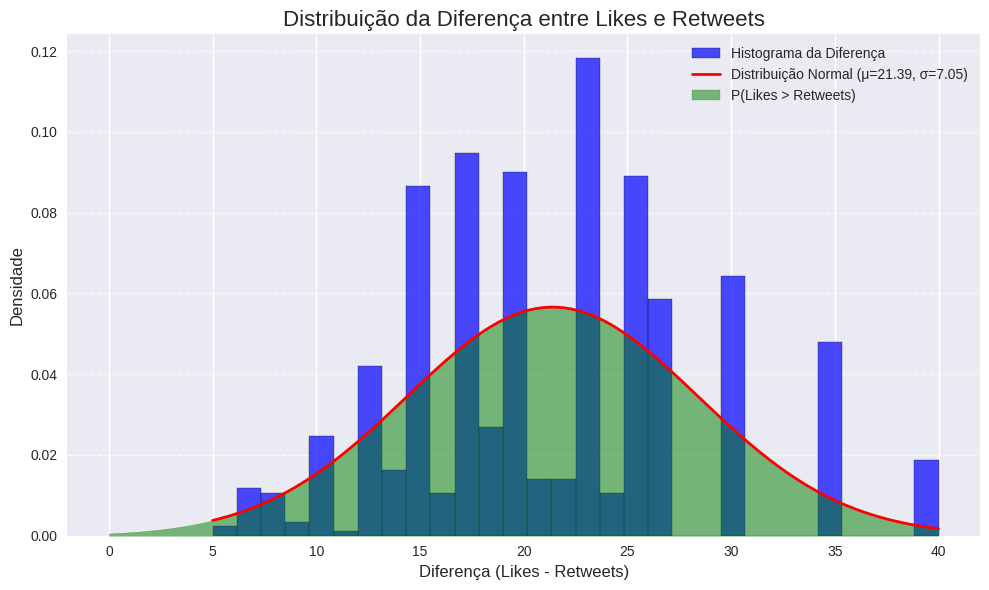

Probabilidade de ter mais Likes do que Retweets: 0.9988


In [37]:
# Calculando a diferen√ßa entre Likes e Retweets
df_clean['Difference'] = df_clean['Likes'] - df_clean['Retweets']

# Ajuste distribui√ß√£o normal √† diferen√ßa
mu_diff, sigma_diff = norm.fit(df_clean['Difference'])

# Valores x Curva de distribui√ß√£o normal
x_diff = np.linspace(min(df_clean['Difference']), max(df_clean['Difference']), 100)
pdf_diff = norm.pdf(x_diff, mu_diff, sigma_diff)

# Curva de distribui√ß√£o normal
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Difference'], bins=30, density=True, color='blue', alpha=0.7, edgecolor='black', label='Histograma da Diferen√ßa')
plt.plot(x_diff, pdf_diff, 'r-', lw=2, label=f'Distribui√ß√£o Normal (Œº={mu_diff:.2f}, œÉ={sigma_diff:.2f})')

# Destacar a √°rea onde D > 0 (Likes > Retweets)
x_positive = np.linspace(0, max(df_clean['Difference']), 100)
pdf_positive = norm.pdf(x_positive, mu_diff, sigma_diff)
plt.fill_between(x_positive, pdf_positive, color='green', alpha=0.5, label='P(Likes > Retweets)')

# T√≠tulos e r√≥tulos
plt.title('Distribui√ß√£o da Diferen√ßa entre Likes e Retweets', fontsize=16)
plt.xlabel('Diferen√ßa (Likes - Retweets)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

# Calcular a probabilidade de ter mais Likes > Retweets
z_score = (0 - mu_diff) / sigma_diff
prob_likes_greater_than_retweets = 1 - norm.cdf(z_score)
print(f"Probabilidade de ter mais Likes do que Retweets: {prob_likes_greater_than_retweets:.4f}")

**Discuss√£o: **Hipoteticamente para a minha pesquisa, qual a probabilidade de sair mais likes do que retweets?

Probabilidade de ter mais** Likes do que Retweets**: 0.9988

Primeiro √© calculado a diferen√ßa entre Likes e Retweets:
D= Likes - Retweets
Depois √© ajustado a distribui√ß√£o normal os valores da diferen√ßa, e obt√©m-se a m√©dia (Œº_diff) e o desvio padr√£o (œÉ_diff). Onde a √°rea destacada D > 0 √© a que possui mais likes do que retweets. Para calcular a probabilidade D > 0 uso a fun√ß√£o (norm.cdf()):
P(D > 0)=1 - P(D ‚â§ 0)

Ap√≥s calculo o Z-score e os valores aleat√≥rio (50, 25, 5), obt√©m-se a √°rea destacada em verde representa a probabilidade de uma publica√ß√£o ter mais likes do que retweets.

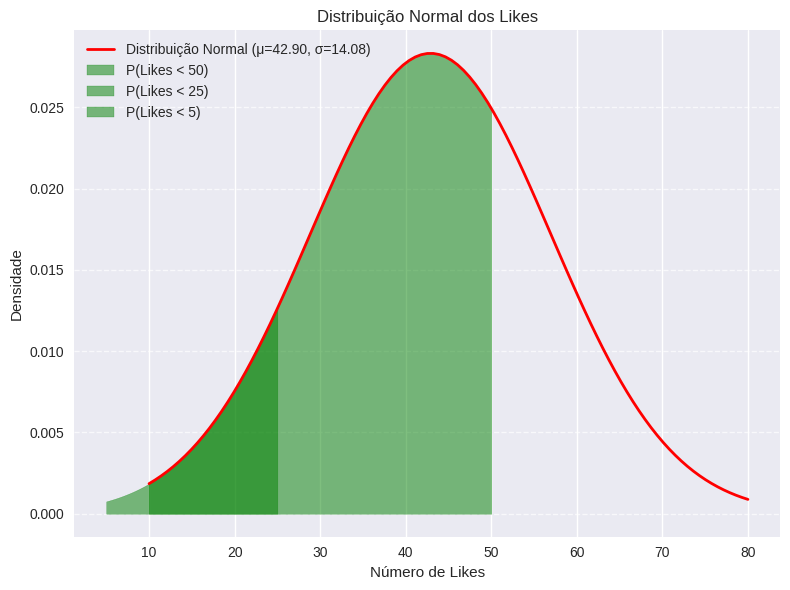

Z-score para 50 likes: 0.50
Probabilidade de ter menos de 50 likes: 0.6929

Z-score para 25 likes: -1.27
Probabilidade de ter menos de 25 likes: 0.1018

Z-score para 5 likes: -2.69
Probabilidade de ter menos de 5 likes: 0.0036



In [43]:
# Valores aleat√≥rios
values_of_interest = [50, 25, 5]

# Calcular Z-scores e probabilidades
z_scores = [(value - mu) / sigma for value in values_of_interest]
probabilities = [norm.cdf(z_score) for z_score in z_scores]

# Plotar a distribui√ß√£o normal com as √°reas destacadas
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', lw=2, label=f'Distribui√ß√£o Normal (Œº={mu:.2f}, œÉ={sigma:.2f})')

# Destacar as √°reas sob a curva os valores escolhidos
for value in values_of_interest:
    x_area = np.linspace(min(df_clean['Likes']), value, 100)
    pdf_area = norm.pdf(x_area, mu, sigma)
    plt.fill_between(x_area, pdf_area, color='green', alpha=0.5, label=f'P(Likes < {value})')

# Adicionar t√≠tulos e r√≥tulos
plt.title('Distribui√ß√£o Normal dos Likes')
plt.xlabel('N√∫mero de Likes')
plt.ylabel('Densidade')
plt.legend()

# Layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Resultado
for i, value in enumerate(values_of_interest):
    print(f"Z-score para {value} likes: {z_scores[i]:.2f}")
    print(f"Probabilidade de ter menos de {value} likes: {probabilities[i]:.4f}\n")

    # Filtro com a hashtag #Food
df_food = df_clean[df_clean['Hashtags'].str.contains('#Food', case=False, na=False)]

# Filtro com a hashtag #Fitness
df_fitness = df_clean[df_clean['Hashtags'].str.contains('#Fitness', case=False, na=False)]

No c√≥digo abaixo √© representado a probabilidade de likes e retweets por **hashtag**, os valores continuam sendo (50, 25, 5):
Foi calculado os Z-scores usando a f√≥rmula Z= x-Œº
                                            œÉ
Usamos norm.cdf(z_score) para calcular as probabilidades acumuladas. Se os dados forem insuficientes ou o desvio padr√£o for zero retorna uma mensagem.

In [63]:
#  Verificando se o desvio padr√£o √© maior que zero.
# Ajuste na distribui√ß√£o normal aos dados de 'Likes' (#Food)
if not df_food.empty and df_food['Likes'].std() > 0:
    mu_likes, sigma_likes = norm.fit(df_food['Likes'])
else:
    print("Dados insuficientes ou desvio padr√£o zero para Likes (#Food).")
    mu_likes, sigma_likes = None, None

# Ajuste na distribui√ß√£o normal aos dados de 'Retweets' (#Fitness)
if not df_fitness.empty and df_fitness['Retweets'].std() > 0:
    mu_retweets, sigma_retweets = norm.fit(df_fitness['Retweets'])
else:
    print("Dados insuficientes ou desvio padr√£o zero para Retweets (#Fitness).")
    mu_retweets, sigma_retweets = None, None

# Valores aleat√≥rios
values_of_interest = [50, 25, 5]

# Fun√ß√£o para calcular Z-score e probabilidade acumulada
def calculate_probabilities(data, values):
    if data.std() == 0 or data.empty:
        print("Dados inv√°lidos ou desvio padr√£o zero. N√£o √© poss√≠vel calcular probabilidades.")
        return pd.DataFrame()

    mu, sigma = norm.fit(data)
    results = []
    for value in values:
        z_score = (value - mu) / sigma
        probability = norm.cdf(z_score)

        # Verifica√ß√£o da probabilidade n√£o ser negativa
        if probability < 0:
            print(f"Aviso: Probabilidade negativa encontrada para o valor {value}. Ajustando para 0.")
            probability = 0

        results.append({
            'Valor': value,
            'Z-score': z_score,
            'Probabilidade Acumulada': probability
        })
    return pd.DataFrame(results)

# Probabilidades para Likes (#Food)
if mu_likes is not None and sigma_likes is not None:
    probabilities_likes = calculate_probabilities(df_food['Likes'], values_of_interest)
    print("\nProbabilidades para Likes (#Food):\n")
    display(probabilities_likes.style.format({'Z-score': '{:.4f}', 'Probabilidade Acumulada': '{:.6f}'}))
else:
    print("\nN√£o foi poss√≠vel calcular probabilidades para Likes (#Food).\n")

# Probabilidades para Retweets (#Fitness)
if mu_retweets is not None and sigma_retweets is not None:
    probabilities_retweets = calculate_probabilities(df_fitness['Retweets'], values_of_interest)
    print("\nProbabilidades para Retweets (#Fitness):\n")
    display(probabilities_retweets.style.format({'Z-score': '{:.4f}', 'Probabilidade Acumulada': '{:.6f}'}))
else:
    print("\nN√£o foi poss√≠vel calcular probabilidades para Retweets (#Fitness).\n")

Dados insuficientes ou desvio padr√£o zero para Likes (#Food).

N√£o foi poss√≠vel calcular probabilidades para Likes (#Food).


Probabilidades para Retweets (#Fitness):



C) Para s = 0.80, reproduza a mesma simula√ß√£o do slide anterior. Fa√ßa o c√°lculo explicitamente, usando a equa√ß√£o. Compare os resultados. Mostre o histograma tamb√©m para as 10 primeiras amostras, conforme exemplo dos pr√≥ximos slides.

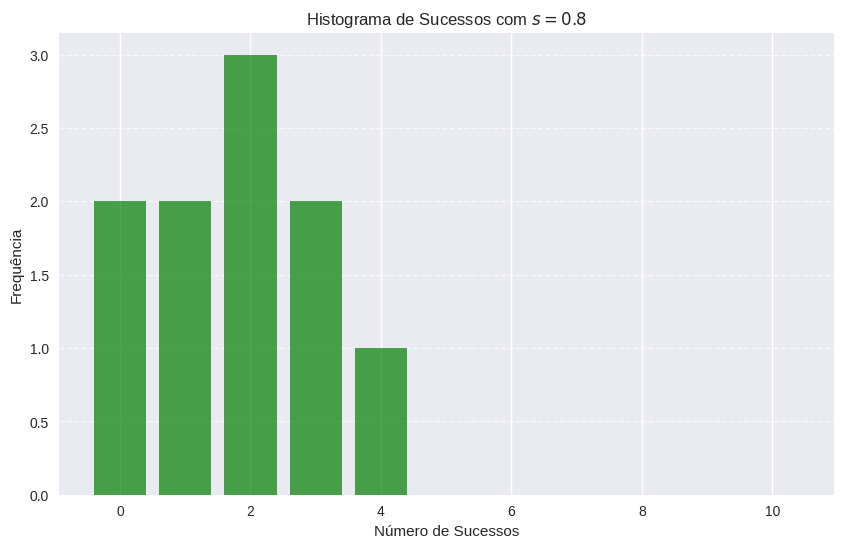

Compara√ß√£o entre simula√ß√£o e c√°lculo expl√≠cito:
x = 0: Simula√ß√£o: 0.2000, Binomial: 0.0000
x = 1: Simula√ß√£o: 0.2000, Binomial: 0.0000
x = 2: Simula√ß√£o: 0.3000, Binomial: 0.0001
x = 3: Simula√ß√£o: 0.2000, Binomial: 0.0008
x = 4: Simula√ß√£o: 0.1000, Binomial: 0.0055
x = 5: Simula√ß√£o: 0.0000, Binomial: 0.0264
x = 6: Simula√ß√£o: 0.0000, Binomial: 0.0881
x = 7: Simula√ß√£o: 0.0000, Binomial: 0.2013
x = 8: Simula√ß√£o: 0.0000, Binomial: 0.3020
x = 9: Simula√ß√£o: 0.0000, Binomial: 0.2684
x = 10: Simula√ß√£o: 0.0000, Binomial: 0.1074


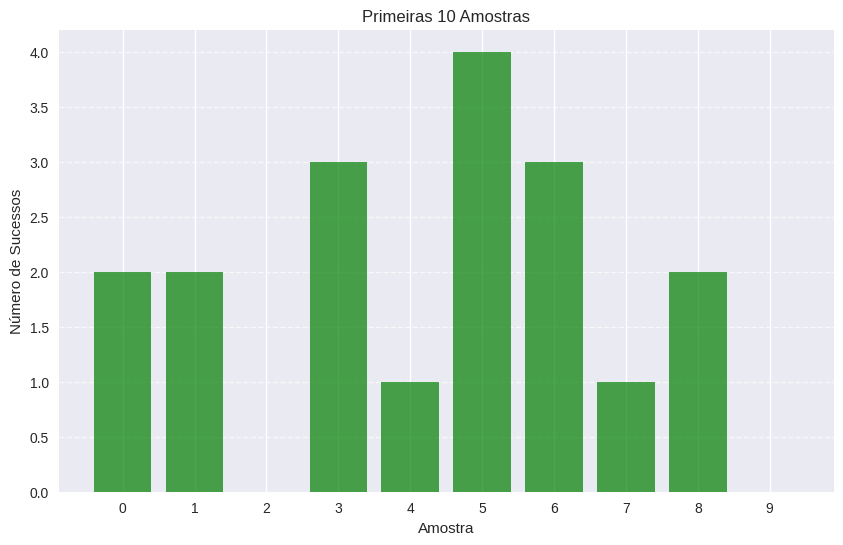

In [67]:
# Par√¢metros da simula√ß√£o
s = 0.80  # Probabilidade de sucesso
n = 10    # N√∫mero de tentativas por simula√ß√£o
num_simulations = 10  # N√∫mero de simula√ß√µes

# Simula√ß√£o
np.random.seed(42)  # Para reprodutibilidade
samples = np.random.rand(num_simulations, n)  # Gerar amostras aleat√≥rias
successes = np.sum(samples >= s, axis=1)  # Contar sucessos (valores >= s)

# Histograma das simula√ß√µes
plt.figure(figsize=(10, 6))
plt.hist(successes, bins=np.arange(-0.5, n + 1.5), align='mid', rwidth=0.8, color='green', alpha=0.7)
plt.title(f'Histograma de Sucessos com $s = {s}$')
plt.xlabel('N√∫mero de Sucessos')
plt.ylabel('Frequ√™ncia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# C√°lculo expl√≠cito da probabilidade usando a distribui√ß√£o binomial
p = s  # Probabilidade de sucesso
q = 1 - p  # Probabilidade de fracasso
x_values = np.arange(n + 1)  # N√∫meros de sucessos poss√≠veis
probabilities = binom.pmf(x_values, n, p)  # Probabilidades binomiais

# Compara√ß√£o entre simula√ß√£o e c√°lculo expl√≠cito
print("Compara√ß√£o entre simula√ß√£o e c√°lculo expl√≠cito:")
for x in range(n + 1):
    print(f"x = {x}: Simula√ß√£o: {np.mean(successes == x):.4f}, Binomial: {probabilities[x]:.4f}")

# Histograma das primeiras 10 amostras
plt.figure(figsize=(10, 6))
plt.bar(range(10), successes[:10], color='green', alpha=0.7)
plt.title('Primeiras 10 Amostras')
plt.xlabel('Amostra')
plt.ylabel('N√∫mero de Sucessos')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()